In [1]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb
import matplotlib.pyplot as plt
 
from sklearn.datasets import load_diabetes

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from yellowbrick.base import Visualizer
from yellowbrick.exceptions import YellowbrickValueError


##########################################################################
## TargetVisualizer Base Class
##########################################################################

class TargetVisualizer(Visualizer):
    """
    The base class for target visualizers, generic enough to support any
    computation on a single vector, y. This Visualizer is based on the
    LabelEncoder in sklearn.preprocessing, which only accepts a target y.
    """

    def fit(self, y):
        """
        Fit the visualizer to the target y. Note that this visualizer breaks
        the standard estimator interface, and therefore cannot be used inside
        of pipelines, but must be used separately; similar to how the
        LabelEncoder is used.
        """
        raise NotImplementedError(
            "target visualizers must implement a fit method"
        )


##########################################################################
## Balanced Binning Reference
##########################################################################

class BalancedBinningReference(TargetVisualizer):
    """
    BalancedBinningReference generates a histogram with vertical lines
    showing the recommended value point to bin your data so they can be evenly
    distributed in each bin.

    Parameters
    ----------
    ax : matplotlib Axes, default: None
        This is inherited from FeatureVisualizer and is defined within
        ``BalancedBinningReference``.

    target : string, default: "Frequency"
        The name of the ``y`` variable

    bins : number of bins to generate the histogram, default: 4

    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers.
        
    Attributes
    ----------
    bin_edges : binning reference values

    Examples
    --------
    >>> visualizer = BalancedBinningReference()
    >>> visualizer.fit(y)
    >>> visualizer.show()


    Notes
    -----
    These parameters can be influenced later on in the visualization
    process, but can and should be set as early as possible.
    """

    def __init__(self, ax=None, target=None, bins=4, **kwargs):

        super(BalancedBinningReference, self).__init__(ax, **kwargs)

        self.target = target
        self.bins = bins

    def draw(self, y, **kwargs):
        """
        Draws a histogram with the reference value for binning as vertical
        lines.

        Parameters
        ----------
        y : an array of one dimension or a pandas Series
        """

        # draw the histogram
        hist, bin_edges = np.histogram(y, bins=self.bins)
        self.bin_edges_ = bin_edges
        self.ax.hist(y, bins=self.bins, color=kwargs.pop("color", "#6897bb"), **kwargs)

        # add vetical line with binning reference values
        plt.vlines(bin_edges,0,max(hist),colors=kwargs.pop("colors", "r"))

    def fit(self, y, **kwargs):
        """
        Sets up y for the histogram and checks to
        ensure that ``y`` is of the correct data type.
        Fit calls draw.

        Parameters
        ----------
        y : an array of one dimension or a pandas Series

        kwargs : dict
            keyword arguments passed to scikit-learn API.

        """

        #throw an error if y has more than 1 column
        if y.ndim > 1:
            raise YellowbrickValueError("y needs to be an array or Series with one dimension") 

        # Handle the target name if it is None.
        if self.target is None:
            self.target = 'Frequency'

        self.draw(y)
        return self


    def show(self, **kwargs):
        """
        Creates the labels for the feature and target variables.
        """

        self.ax.set_xlabel(self.target)
        self.finalize(**kwargs)

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls show and show calls finalize.

        Parameters
        ----------
        kwargs: generic keyword arguments.

        """

        for tk in self.ax.get_xticklabels():
            tk.set_visible(True)
            
        for tk in self.ax.get_yticklabels():
            tk.set_visible(True)
        
        
##########################################################################
## Quick Method
##########################################################################
        
def balanced_binning_reference(y, ax=None, target='Frequency', bins=4, **kwargs):
    
    """
    BalancedBinningReference generates a histogram with vertical lines
    showing the recommended value point to bin your data so they can be evenly
    distributed in each bin.

    Parameters
    ----------
    y : an array of one dimension or a pandas Series
    
    ax : matplotlib Axes, default: None
        This is inherited from FeatureVisualizer and is defined within
        ``BalancedBinningReference``.

    target : string, default: "Frequency"
        The name of the ``y`` variable

    bins : number of bins to generate the histogram, default: 4

    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers.

    """

    # Initialize the visualizer
    visualizer = BalancedBinningReference(ax=ax, bins=bins, target=target, **kwargs)
    
    # Fit and show the visualizer
    visualizer.fit(y)
    visualizer.show()

In [3]:
def balanced_binning_reference():
    # Load a regression data set
    data = load_diabetes()

    # Extract the target variable
    y = data['target']

    # Instantiate and fit the visualizer
    visualizer = BalancedBinningReference()
    visualizer.fit(y)
    return visualizer.show()




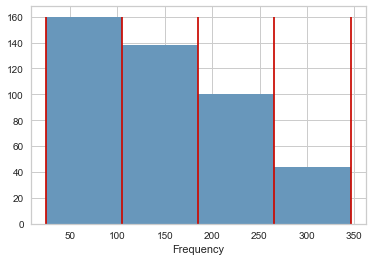

In [4]:
balanced_binning_reference()